In [1]:
import numpy as np #Linear Algebra
import pandas as pd #Data Processing
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\Dell\Desktop\Crop_Prediction_Tool\Dataset.csv') #To read a csv file as dataframe
data.head(10) # Return topmost n rows from the csv

,N,P,K,temperature,humidity,ph,rainfall,label
0,71,54,16,22.613600,63.690706,5.749914,87.759539,maize
1,61,44,17,26.100184,71.574769,6.931757,102.266244,maize
2,80,43,16,23.558821,71.593514,6.657965,66.719955,maize
3,73,58,21,19.972160,57.682729,6.596061,60.651715,maize
4,61,38,20,18.478913,62.695039,5.970458,65.438354,maize
5,68,41,16,21.776893,57.808406,6.158831,102.086169,maize
6,93,41,17,25.621717,66.504155,6.047907,105.465470,maize
7,89,60,19,25.191924,66.690290,5.913665,78.066396,maize
8,76,44,17,20.416831,62.554248,5.855442,65.277985,maize
9,67,60,25,24.921622,66.786274,5.750255,109.216228,maize


In [3]:
data.describe() #To find various parameters for the column

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [4]:
data.corr()#Seeing the coorelation between the data

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


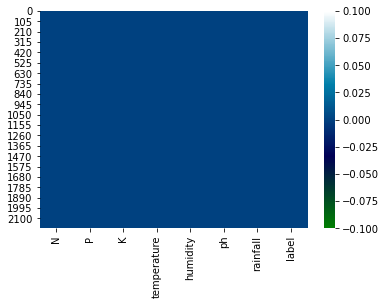

In [5]:
sns.heatmap(data.isnull(),cmap='ocean')
plt.show()
#As it could be seen with the heatmap below that we have data which has no NULL values
#If NULL values would have been present they are required to be removed with the help of dropna function or any other data cleaning method

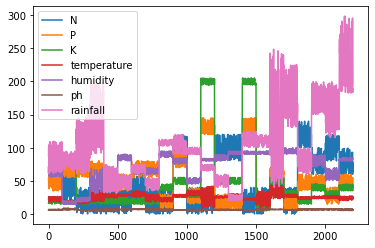

In [6]:
data.plot()
plt.show()
#The data clearly cannot be analysed by this plot

<AxesSubplot:xlabel='ph', ylabel='Density'>

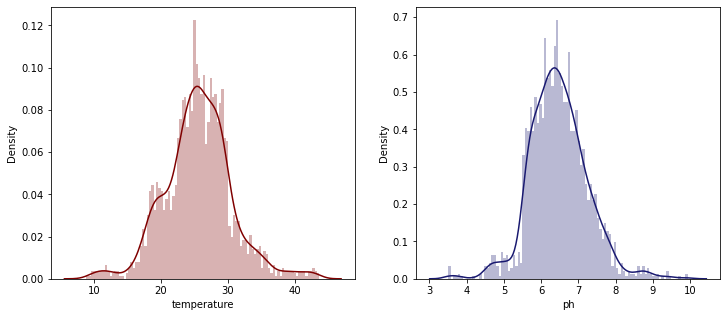

In [7]:
#These plots are used for analyzing apropriate temprature and PH for crop growth
#distplot is used to plot data against density of that data

plt.figure(figsize=(12,5))#Creates an empty plot of the given size

plt.subplot(1, 2, 1)
#Use to create multiple plots in one 
#the figure is for 1 row, 2 columns, and this plot is the first plot.
sns.distplot(data['temperature'],color="maroon", bins=100, hist_kws={'alpha':0.3})

plt.subplot(1, 2, 2)
#the figure is for 1 row, 2 columns, and this plot is the first plot.
sns.distplot(data['ph'],color="midnightblue", bins=100, hist_kws={'alpha':0.3})

Text(0, 0.5, 'Crop')

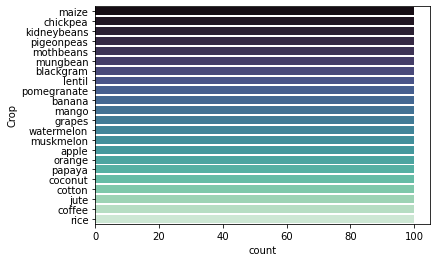

In [8]:
sns.countplot(y='label',data=data, palette="mako")
plt.ylabel('Crop')
# As data count for all the crop is similar we are not required to downsample

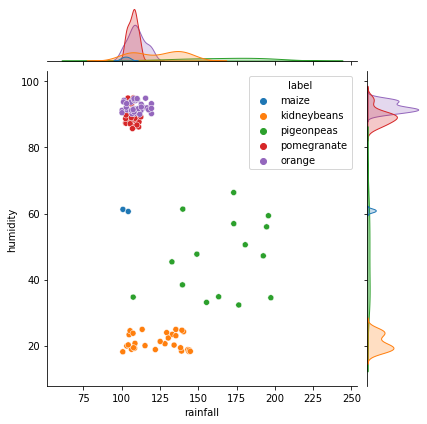

In [9]:
#Creating plots like this we colud analyse the crop suitable for preferable weather conditions
sns.jointplot(x="rainfall",y="humidity",data=data[(data['temperature']<20) & (data['rainfall']>100)],hue="label")

Text(0.5, 0, 'PH')

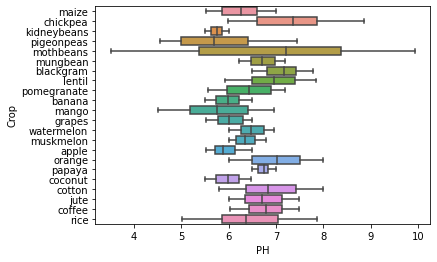

In [10]:
#PH variations to analyse the preferable PH for a given crop
sns.boxplot(y='label',x='ph',data=data)
plt.ylabel('Crop')
plt.xlabel('PH')
#Boxplots could also be made for analysing optimum value of N, P, K

In [11]:
#Data Pre-processing
#By this we have categorized label values into numbers
data.label.astype('category').cat.codes.head(10)

0    11
1    11
2    11
3    11
4    11
5    11
6    11
7    11
8    11
9    11
dtype: int8

In [12]:
#Simply having codes for crops wont help us in reversting back to them so here dictionary is created to revert back to a crop
c=data.label.astype('category')
targets = dict(enumerate(c.cat.categories))
targets

{0: 'apple',
 1: 'banana',
 2: 'blackgram',
 3: 'chickpea',
 4: 'coconut',
 5: 'coffee',
 6: 'cotton',
 7: 'grapes',
 8: 'jute',
 9: 'kidneybeans',
 10: 'lentil',
 11: 'maize',
 12: 'mango',
 13: 'mothbeans',
 14: 'mungbean',
 15: 'muskmelon',
 16: 'orange',
 17: 'papaya',
 18: 'pigeonpeas',
 19: 'pomegranate',
 20: 'rice',
 21: 'watermelon'}

In [13]:
data['Code']=c.cat.codes #Adding those code in the frame
y=data.Code #Crop code in y
x=data[['N','P','K','temperature','humidity','ph','rainfall']]

In [15]:
#scaling
#As temprature and PH are Gaussian Distributed hence we need to scale them from 0 to 1
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y,random_state=1,test_size=0.25)

In [16]:
#Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
accuracy=clf.score(X_test,y_test)
print ("Predicted model accuracy: "+ str(accuracy))

Nitrogen = input('Enter the Nitrogen Content:')
Phosphorus = input('Enter the Phosphorus Content:')
Potassium=input('Enter the Potassium Content:')
Temprature=input('Enter the Temprature recorded:')
Humidity=input('Enter the amount of humidity recorded:')
PH=input('Enter the value of PH:')
Rainfall=input('Enter the rainfall recorded in that season:')
x_test_data=[[Nitrogen,Phosphorus,Potassium,Temprature,Humidity,PH,Rainfall]]
Tree_predict = clf.predict(x_test_data)
print("The crop to be preferd as per Desicion Tree Algorithm is:",targets[int(Tree_predict)])

Predicted model accuracy: 0.9890909090909091
Enter the Nitrogen Content:35
Enter the Phosphorus Content:135
Enter the Potassium Content:199
Enter the Temprature recorded:28
Enter the amount of humidity recorded:80
Enter the value of PH:6
Enter the rainfall recoreded in that season:69
The crop to be preferd as per Desicion Tree Algorithm is: grapes


In [23]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4,n_estimators=150,random_state=42).fit(X_train, y_train)

print('RF Accuracy on training set:',(clf.score(X_train, y_train)))
print('RF Accuracy on test set:',(clf.score(X_test, y_test)))

Nitrogen = input('Enter the Nitrogen Content:')
Phosphorus = input('Enter the Phosphorus Content:')
Potassium=input('Enter the Potassium Content:')
Temprature=input('Enter the Temprature recorded:')
Humidity=input('Enter the amount of humidity recorded:')
PH=input('Enter the value of PH:')
Rainfall=input('Enter the rainfall recoreded in that season:')
x_test_data=[[Nitrogen,Phosphorus,Potassium,Temprature,Humidity,PH,Rainfall]]
Tree_predict = clf.predict(x_test_data)
print("The crop to be preferd as per Desicion Tree Algorithm is:",targets[int(Tree_predict)])

RF Accuracy on training set: 0.9478787878787879
RF Accuracy on test set: 0.9345454545454546
Enter the Nitrogen Content:35
Enter the Phosphorus Content:135
Enter the Potassium Content:199
Enter the Temprature recorded:28
Enter the amount of humidity recorded:80
Enter the value of PH:6
Enter the rainfall recoreded in that season:69
The crop to be preferd as per Desicion Tree Algorithm is: grapes


In [21]:
#KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
accuracy=knn.score(X_test, y_test)
print ("Predicted model accuracy:"+ str(accuracy))

Nitrogen = input('Enter the Nitrogen Content:')
Phosphorus = input('Enter the Phosphorus Content:')
Potassium=input('Enter the Potassium Content:')
Temprature=input('Enter the Temprature recorded:')
Humidity=input('Enter the amount of humidity recorded:')
PH=input('Enter the value of PH:')
Rainfall=input('Enter the rainfall recoreded in that season:')
x_test_data=scaler.transform([[Nitrogen,Phosphorus,Potassium,Temprature,Humidity,PH,Rainfall]])
knn_predict = knn.predict(x_test_data)
print("The crop to be preferd as per Desicion Tree Algorithm is:",targets[int(knn_predict)])

Predicted model accuracy:0.9836363636363636
Enter the Nitrogen Content:35
Enter the Phosphorus Content:135
Enter the Potassium Content:199
Enter the Temprature recorded:28
Enter the amount of humidity recorded:80
Enter the value of PH:6
Enter the rainfall recoreded in that season:69
The crop to be preferd as per Desicion Tree Algorithm is: grapes


In [22]:
#As the accuracy of Decision Tree Algorithm is highest among the three it is prefered in our project